In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df_startup=pd.read_csv("https://raw.githubusercontent.com/digipodium/Machine-Learning-mtf-830-oct12/master/datasets/50_Startups.csv?token=AQCIHGNSQSNXPZBAN3KBFAC73CWYY")

In [3]:
state_hot_enc=OneHotEncoder(drop='first')
state_dummies=state_hot_enc.fit_transform(df_startup[['State']]).toarray()


In [4]:
dummydf=pd.DataFrame(data=state_dummies,columns=['Florida','New York'])
df_startup=pd.concat([df_startup,dummydf],axis=1)
df_startup.drop(columns='State',inplace=True)

In [5]:
x=df_startup[['R&D Spend', 'Administration', 'Marketing Spend', 'Florida',
        'New York']]
y=df_startup['Profit']
scaler=StandardScaler()
scaled_X=scaler.fit_transform(x)

In [6]:
trainx,testx,trainy,testy=train_test_split(scaled_X,y,test_size=.2,random_state=0)

In [7]:
model=LinearRegression()
model.fit(trainx,trainy)
ypred=model.predict(x)
score=model.score(testx,testy)*100

C:\Users\hiten\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hiten\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


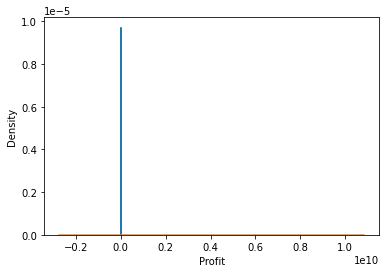

In [8]:
sns.distplot(y,hist=False,label='Original Profit')
sns.distplot(ypred,hist=False,label='Predicted Profit')
plt.show()

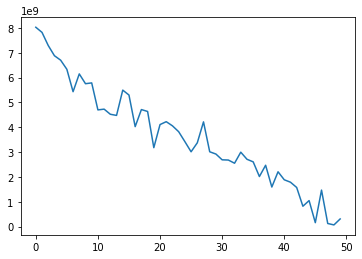

In [10]:
plt.plot(ypred)